<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [67]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [7]:
print(boston_df.columns.values)

boston_df

['Unnamed: 0' 'CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD'
 'TAX' 'PTRATIO' 'LSTAT' 'MEDV']


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


### Task 2: Generate Descriptive Statistics and Visualizations
- For all visualizations, please include a title in each graph and appropriate labels
- Generate the following and explain your findings:
- For the "Median value of owner-occupied homes" provide a boxplot
- Provide a  bar plot for the Charles river variable
- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
- Create a histogram for the pupil to teacher ratio variable

##### Task 2.1: Boxplot for MEDV

Text(0, 0.5, 'Home Value ($1000s)')

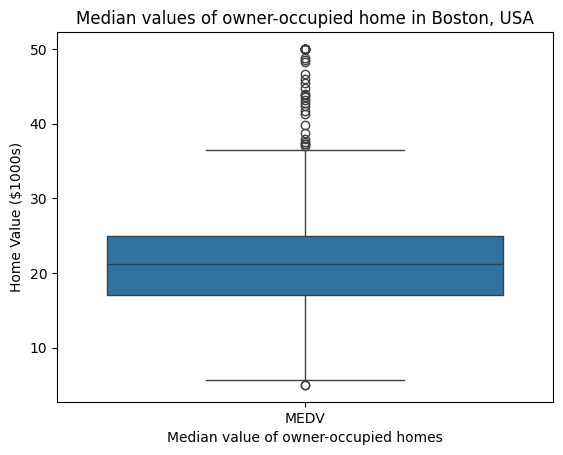

In [29]:
data = boston_df[['MEDV']]


ax = sns.boxplot(data)
ax.set_title('Median values of owner-occupied home in Boston, USA')
ax.set_xlabel("Median value of owner-occupied homes")
ax.set_ylabel("Home Value ($1000s)")



##### Task 2.2: Bar plot of Charles River Variable

<AxesSubplot:title={'center':'Comparison of number of properties that track the Charles River'}, xlabel='CHAS', ylabel='count'>

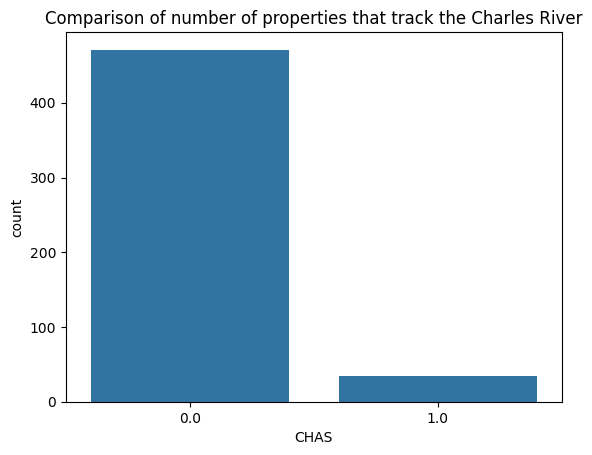

In [31]:
chas = boston_df[['CHAS']]

barplt = sns.countplot(data=chas, x='CHAS')
barplt.set_title('Comparison of number of properties that track the Charles River') 
barplt

##### Task 2.3: Descritise the data and create boxplots

In [42]:
# Descritise the data using df.loc

boston_df.loc[boston_df['AGE'] < 35, 'Age Group'] = 'Under 35'
boston_df.loc[(boston_df['AGE'] >= 35) & (boston_df['AGE'] <= 75), 'Age Group'] = 'Between 35 and 75'
boston_df.loc[boston_df['AGE'] > 75, 'Age Group'] = 'Over 75'
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age Group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Between 35 and 75
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,Over 75
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Between 35 and 75
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Between 35 and 75
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Between 35 and 75


[Text(0.5, 1.0, 'Median Property Values by Age group'),
 Text(0, 0.5, 'Median Value ($1000s)')]

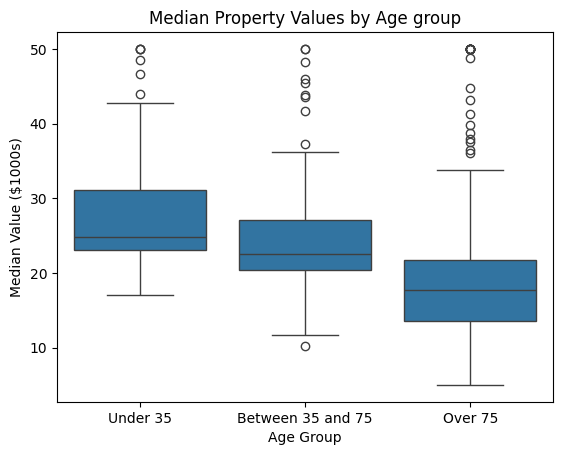

In [50]:
ax = sns.boxplot(data = boston_df, x='Age Group', y='MEDV', order=['Under 35', 'Between 35 and 75', 'Over 75'])
ax.set(title='Median Property Values by Age group', ylabel='Median Value ($1000s)')

##### Task 2.4: scatter plot nitric oxide to non-retail businesses

[Text(0.5, 1.0, 'The relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town'),
 Text(0.5, 0, 'Proportion of non-retail business acres per town'),
 Text(0, 0.5, 'NOX concentration (parts per 10 million)')]

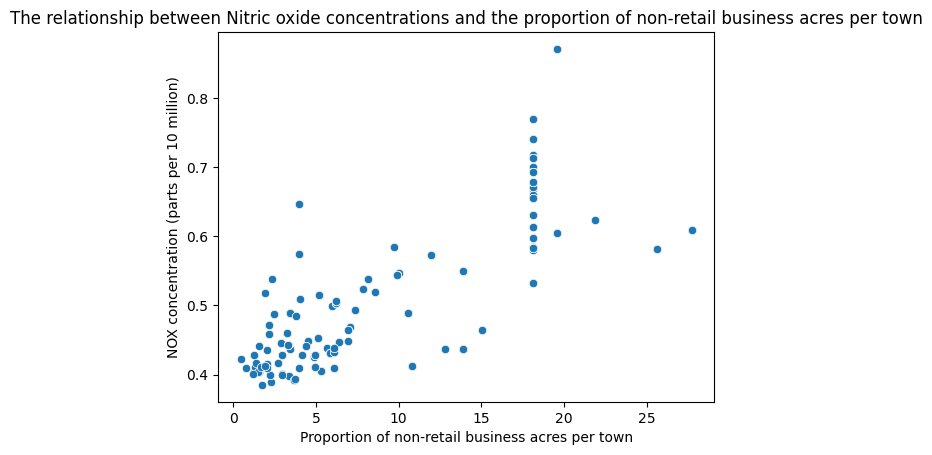

In [54]:
sns.scatterplot(data=boston_df, y='NOX', x='INDUS').set(title='The relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town',
                                                        xlabel='Proportion of non-retail business acres per town',
                                                        ylabel='NOX concentration (parts per 10 million)')

# Viewing the graph below it shows that there is a positive correlation between the number of non-retail businesses and the levels of NOX present

##### Task 2.5: Histogram of pupil-teacher ratio

[Text(0.5, 1.0, 'Distribution of pupil-teacher ratios'),
 Text(0.5, 0, 'Pupil-teacher Ratios')]

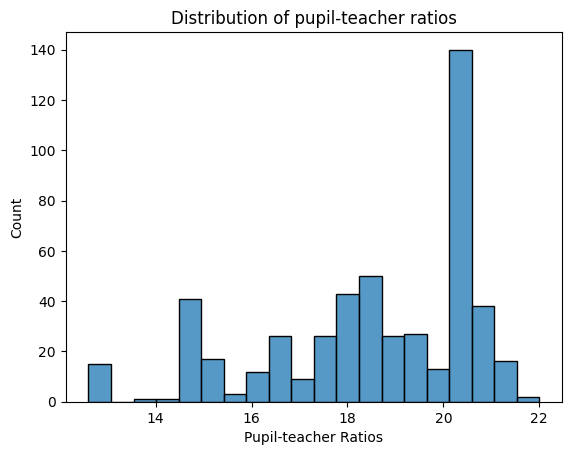

In [62]:
# PTRATIO - pupil-teacher ratio by town

sns.histplot(data=boston_df, x='PTRATIO', bins=20).set(title='Distribution of pupil-teacher ratios', xlabel='Pupil-teacher Ratios')

## Task 3

##### Task 3.2: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- Null hypothesis, H0: There is no significant difference in value of the houses bounded by the river to those not bounded by the river
- Alternative Hypothesis, Ha: There is a significant difference between the two classes

In [69]:
print(boston_df['CHAS'].unique())

bounded = boston_df[boston_df['CHAS'] == 1.]
not_bounded = boston_df[boston_df['CHAS'] == 0.]

# Check normality of the 'MEDV' column for both bounded and not bounded groups
shapiro_bounded = shapiro(bounded['MEDV'])
shapiro_not_bounded = shapiro(not_bounded['MEDV'])

print("Shapiro-Wilk test for bounded:", shapiro_bounded)
print("Shapiro-Wilk test for not_bounded:", shapiro_not_bounded)


[0. 1.]
Shapiro-Wilk test for bounded: ShapiroResult(statistic=0.8359232829918247, pvalue=0.00011230910190445043)
Shapiro-Wilk test for not_bounded: ShapiroResult(statistic=0.9282611613892576, pvalue=3.1144689229367766e-14)


Text(0.5, 1.0, 'Population Distribution for bounded and non-bounded properties')

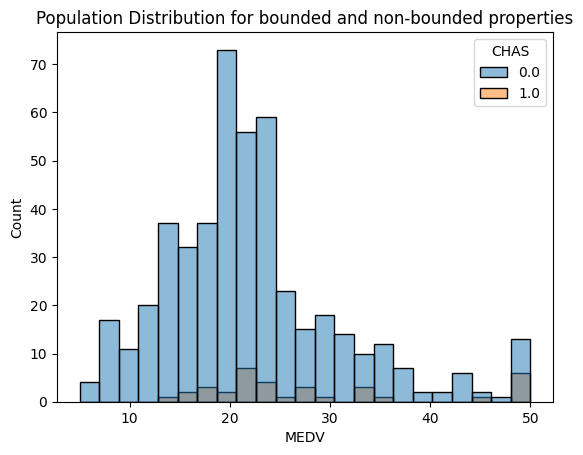

In [75]:
sns.histplot(boston_df, x='MEDV', hue='CHAS').set_title('Population Distribution for bounded and non-bounded properties')

*Looking at the Shapiro Wilk test and the histogram plots we can see that neither group are normally distributed which means we must use a non-parametric t test*

In [77]:
from scipy.stats import mannwhitneyu


mannwhitney_result = mannwhitneyu(bounded['MEDV'], not_bounded['MEDV'])
print("Mann-Whitney U test result:", mannwhitney_result)


Mann-Whitney U test result: MannwhitneyuResult(statistic=10879.5, pvalue=0.0015816705011294974)


As the p value is less than 0.05 we can reject the null hypothesis and say that there is a statistically significant difference in value between properties bounded by the river and those that are not

#### Task 3.2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis: 

- H0: These is no difference between between the property values depending on age
- Ha: There is a difference between the property values depending on age

In [79]:
print(boston_df['Age Group'].unique()) # ['Between 35 and 75' 'Over 75' 'Under 35']

['Between 35 and 75' 'Over 75' 'Under 35']


In [82]:
below_35 = boston_df[boston_df['Age Group'] == 'Under 35']['MEDV']
between_35_75 = boston_df[boston_df['Age Group'] == 'Between 35 and 75']['MEDV']
over_75 = boston_df[boston_df['Age Group'] == 'Over 75']['MEDV']

In [83]:
f_statistic, p_value = scipy.stats.f_oneway(below_35, between_35_75, over_75)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 40.06431640638432, P-Value: 7.155006254871619e-17


*As the P value is less than 0.05 we can reject the null hypothesis and state that there is a difference between age groups*

#### Task 3.3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis: 

- H0: That there is no correlation between the two classes
- H1: That there is a correlation between the two classes

In [85]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])


PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

*As the p value is over 0.05 we can reject the null hypothesis and state that there is a correlation between the two groups*

#### Task 3.4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the Hypotheses:

- H0: Additional weighted distance to the five Boston employment centres has no impact on the median value of owner occupied homes
- Ha: Additional weighted distance to the five Boston employment centres has an impact on the median value of owner occupied homes

In [88]:
X = boston_df ['DIS']
y = boston_df ['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        11:16:36   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*As the P value is below 0.05 we can say that there is a difference in median value dependant on the distance to employement centres*